In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
import nltk
import re
from nltk.corpus import stopwords
import string
data = pd.read_csv(r"C:\Users\plus\Desktop\dataset\consumercomplaints.csv")
print(data)



In [ ]:
data = data.drop("Unnamed: 0",axis=1)

In [ ]:
#have a look if the dataset contains null values or not

print(data.isnull().sum())

In [ ]:
# drop all the rows containing null values 

data = data.dropna()

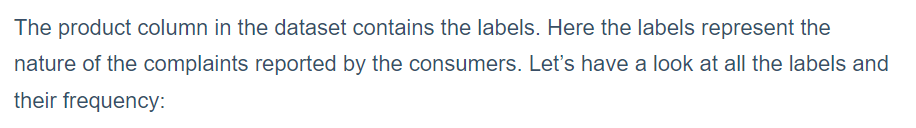

In [33]:
print(data["Product"].value_counts())

Credit reporting, credit repair services, or other personal consumer reports    507582
Debt collection                                                                 192045
Credit card or prepaid card                                                      80410
Checking or savings account                                                      54192
Student loan                                                                     32697
Vehicle loan or lease                                                            19874
Payday loan, title loan, or personal loan                                         1008
Name: Product, dtype: int64


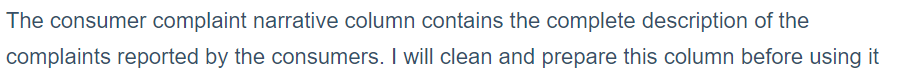

In [ ]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Consumer complaint narrative"] = data["Consumer complaint narrative"].apply(clean)

In [ ]:
#split the data into training and test sets

data = data[["Consumer complaint narrative", "Product"]]
x = np.array(data["Consumer complaint narrative"])
y = np.array(data["Product"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33,random_state=42)

In [ ]:
#train the Machine Learning model using the Stochastic Gradient Descent classification algorithm

sgdmodel = SGDClassifier()
sgdmodel.fit(X_train,y_train)

In [ ]:
#prediction

user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = sgdmodel.predict(data)
print(output)